<a href="https://colab.research.google.com/github/coderzaman/Data-Analysis-Notebooks/blob/main/Assignement_1(Classification__base__Datasets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
# --- Core Libraries for Data Manipulation ---
from google.colab import drive
import pandas as pd
import numpy as np

# --- Libraries for Data Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Scikit-learn for Preprocessing, Models, and Metrics ---
# Preprocessing & Feature Analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, label_binarize

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# --- Library for Handling Imbalanced Data ---
from imblearn.over_sampling import SMOTE

# --- TensorFlow/Keras for Deep Learning ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# --- Other Utilities ---
import warnings
warnings.filterwarnings("ignore")

# --- Notebook Specific Settings ---
sns.set_theme(style='whitegrid') # Sets a nice default style for plots

print("Essential libraries imported successfully.")

Essential libraries imported successfully.


# **Mount Drive**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/HepatitisCdata.csv")
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# **Information About Dataset**

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
df.shape

(615, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Category,object
Age,int64
Sex,object
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64


In [ ]:
df.Category.value_counts()

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


# **Data Preprocessing**

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 3. Create a copy of the DataFrame to store the encoded data
df_encoded = df.copy()

# 4. Apply the encoder directly to each specific column you want to transform
print("--- Applying Label Encoding to 'Category' and 'Sex' columns ---")
df_encoded['Category'] = le.fit_transform(df_encoded['Category'])
df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])


print("\n")
print("--- DataFrame After Label Encoding ---")
print(df_encoded)

--- Applying Label Encoding to 'Category' and 'Sex' columns ---


--- DataFrame After Label Encoding ---
     Unnamed: 0  Category  Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0             1         0   32    1  38.5   52.5    7.7   22.1   7.5   6.93   
1             2         0   32    1  38.5   70.3   18.0   24.7   3.9  11.17   
2             3         0   32    1  46.9   74.7   36.2   52.6   6.1   8.84   
3             4         0   32    1  43.2   52.0   30.6   22.6  18.9   7.33   
4             5         0   32    1  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...       ...  ...  ...   ...    ...    ...    ...   ...    ...   
610         611         4   62    0  32.0  416.6    5.9  110.3  50.0   5.57   
611         612         4   64    0  24.0  102.8    2.9   44.4  20.0   1.54   
612         613         4   64    0  29.0   87.3    3.5   99.0  48.0   1.66   
613         614         4   46    0  33.0    NaN   39.0   62.0  20.0   3.56   
614         615         4 

In [ ]:
# Check for any missing values
df_encoded.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
df = df_encoded
df_encoded.dtypes

,0
Unnamed: 0,int64
Category,int64
Age,int64
Sex,int64
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64


### Handling Missing Values: Replace Nulls with Mean

**Observation:** The dataset contains some missing (null) values in its numerical columns.

**Decision:** Instead of dropping the rows with missing data (`dropna()`), we will use an imputation strategy. Specifically, we will replace the null values in each numerical column with the **mean** of that column.

**Justification:** Dropping rows is often not ideal, especially when the dataset is not very large, as it can lead to a significant loss of valuable information. By filling the missing values with the mean, we can preserve the dataset's size and maintain the statistical properties of the data, allowing us to use all available samples for training our model.

In [ ]:
# First, identify which columns are numerical
numerical_cols = df.select_dtypes(include=np.number).columns

# Now, fill the missing values in ONLY those numerical columns with their respective means
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [ ]:
# Check for any missing values
df.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0


In [ ]:
# Checking for missing data
missing_data = df.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Print the total number of missing values in the entire DataFrame.
total_missing = df.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


### Remove Irrelevant Columns

The dataset contains a column named **"Unnamed: 0"**. This column appears to be an index or ID that was created when the original CSV file was saved.

Since unique identifiers like this have no predictive power and are irrelevant for data analysis and model training, we will remove it from our DataFrame. This is a standard data cleaning step to ensure that only meaningful features are used by our models.

In [ ]:
# Delete Irrelevant Column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.shape

(615, 13)

# **Data Visualization**

**Age Distribution by Patient Category**

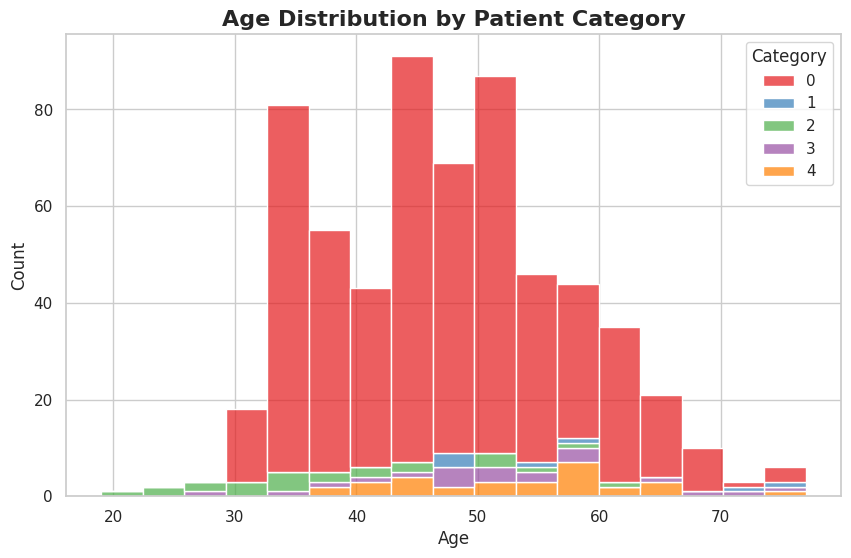

In [ ]:
plt.figure(figsize=(10, 6))

# Create the histogram
bars = sns.histplot(data=df, x='Age', hue='Category', multiple='stack', palette='Set1', alpha=0.7)

# Add a title
plt.title('Age Distribution by Patient Category', fontsize=16, fontweight='bold')  # Customize the title
plt.show()


**Age Distribution of Patients**

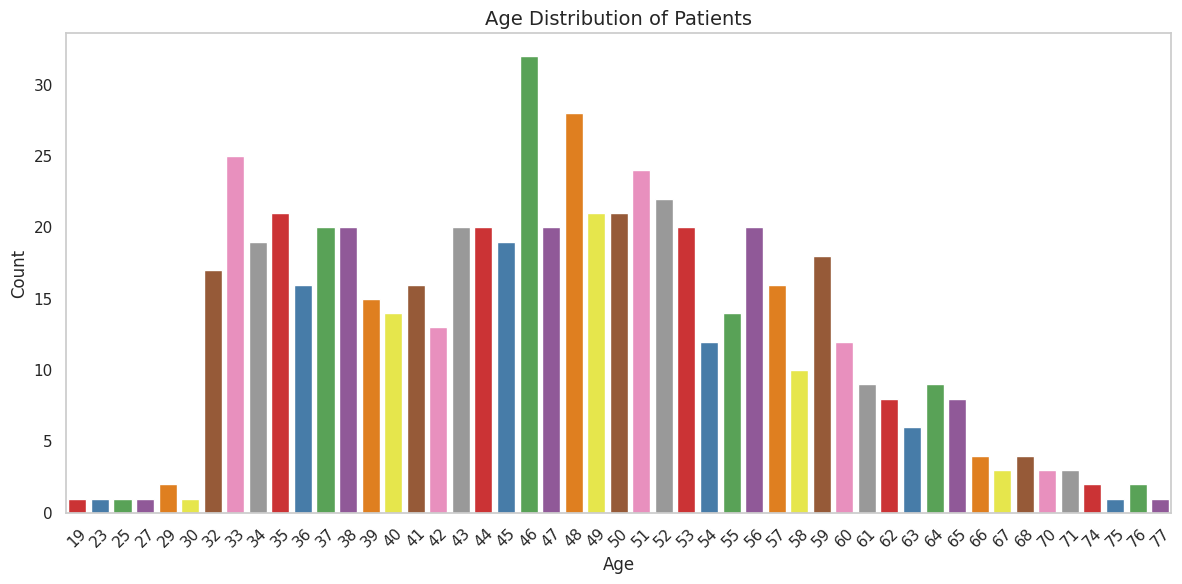

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a count plot for the 'Age' column
sns.countplot(x="Age", data=df, palette="Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()  # Ensure all elements fit within the figure bounds
plt.grid(False)  # Disable grid lines for a cleaner look
plt.show()  # Display the plot


**Average Age by Gender and Category**

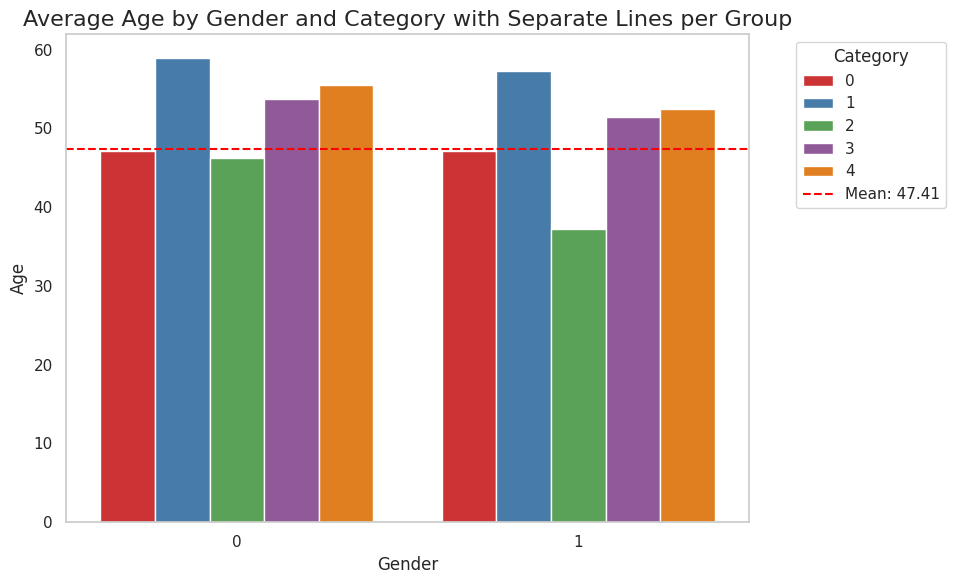

In [ ]:
plt.figure(figsize=(10, 6))
# Create the barplot
bars = sns.barplot(x="Sex", y="Age", data=df, hue="Category", ci=None, palette="Set1")

mean_height = df['Age'].mean()
plt.axhline(mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')

# Add title and labels
plt.title('Average Age by Gender and Category with Separate Lines per Group', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Adjust the legend position
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.tight_layout()
plt.grid(False)
plt.show()



**Gender Distribution by Patient Category**

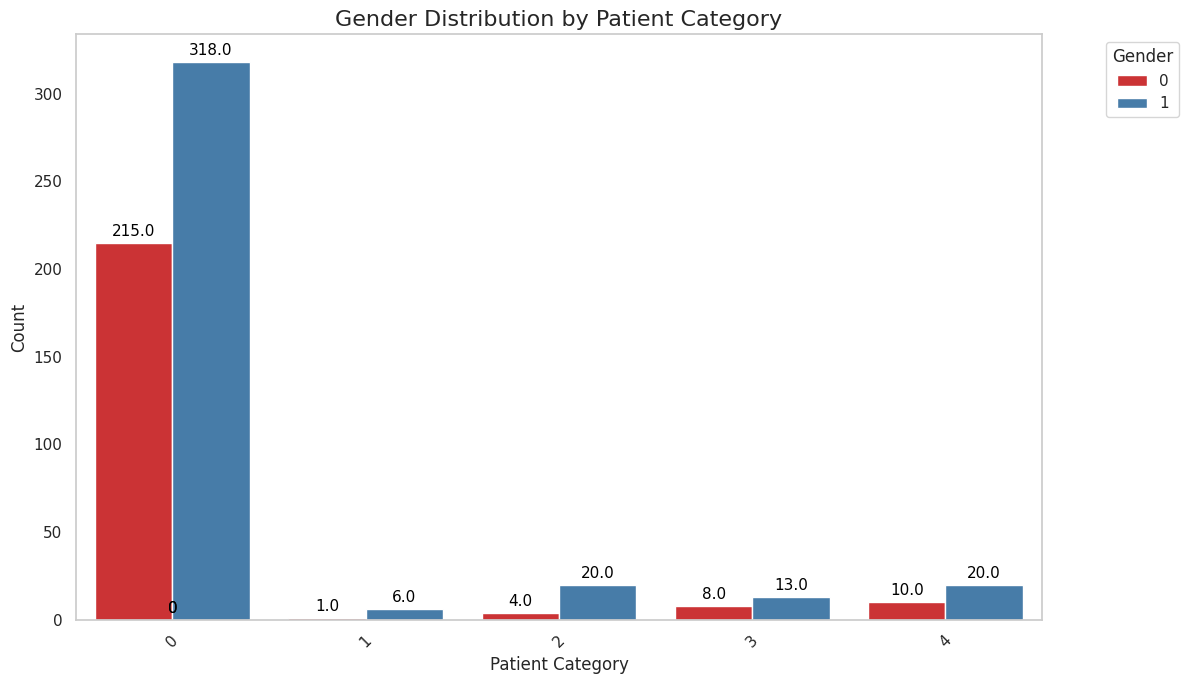

In [ ]:
plt.figure(figsize=(12, 7))  # Adjusted figure size
sns.countplot(data=df, x='Category', hue='Sex', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Gender Distribution by Patient Category', fontsize=16)
plt.xlabel('Patient Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Move the legend
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()  # Ensure everything fits
plt.grid(False)
plt.show()

**Patient Category By Laboratory Value**

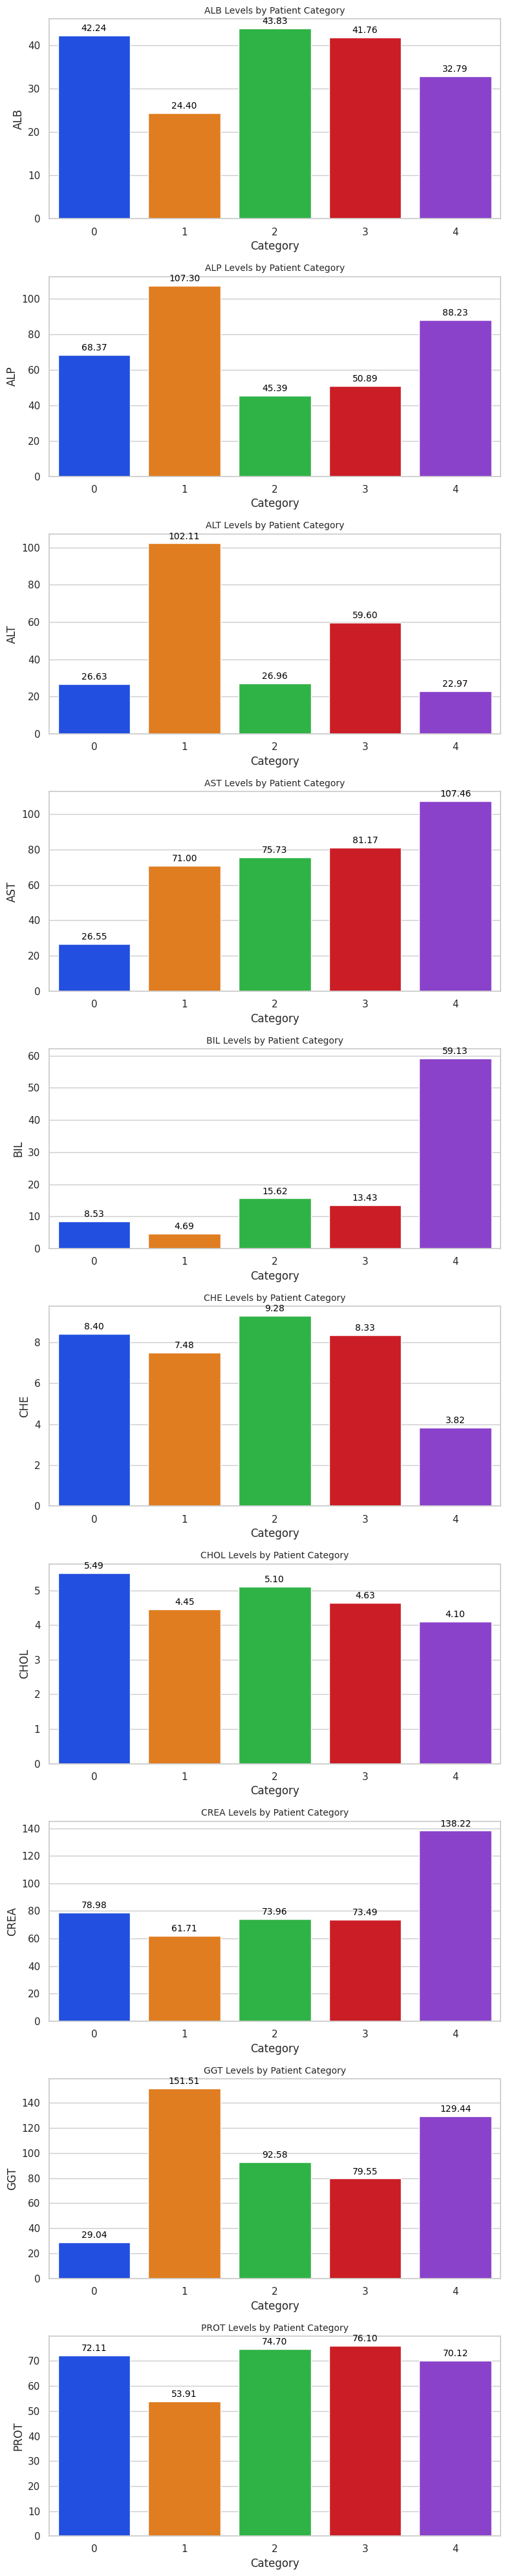

In [ ]:
# Define the variables we want to analyze
variables = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Set up the figure
plt.figure(figsize=(8, len(variables) * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    bars = sns.barplot(data=df, x='Category', y=var, ci=None, palette='bright')

    # Annotate each bar with its height
    for p in bars.patches:
        bars.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

    # Add titles and labels
    plt.title(f'{var} Levels by Patient Category', fontsize=10)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel(var, fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Proportion of patients in each category**

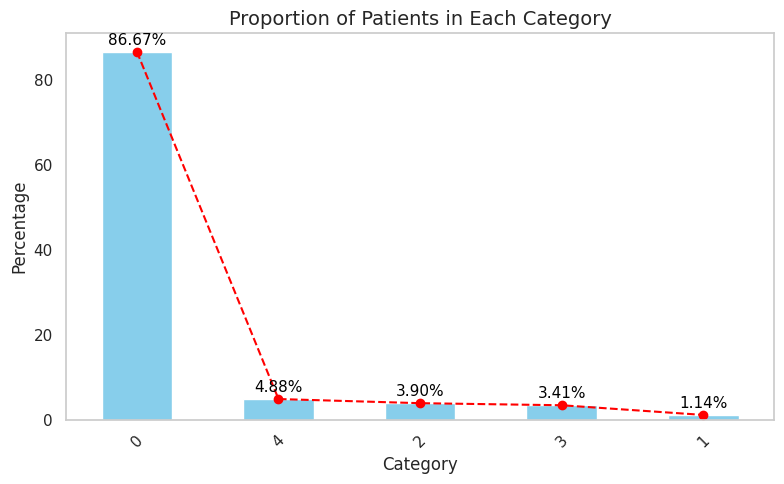

,proportion
Category,
0,86.666667
4,4.878049
2,3.902439
3,3.414634
1,1.138211


In [ ]:
# Proportion of patients in each category
category_counts = df['Category'].value_counts(normalize=True) * 100

# Plot the proportion of each category with enhancements
plt.figure(figsize=(8, 5))
bars = category_counts.plot(kind='bar', color='skyblue')

# Add percentage annotations on top of the bars
for p in bars.patches:
    bars.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                  textcoords='offset points')

# Calculate the center of each bar for the line plot
bar_centers = [p.get_x() + p.get_width() / 2 for p in bars.patches]
bar_heights = [p.get_height() for p in bars.patches]

# Plot the red dashed line following the height of the bars
plt.plot(bar_centers, bar_heights, color='red', linestyle='--', marker='o')

# Add title and labels
plt.title('Proportion of Patients in Each Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

category_counts

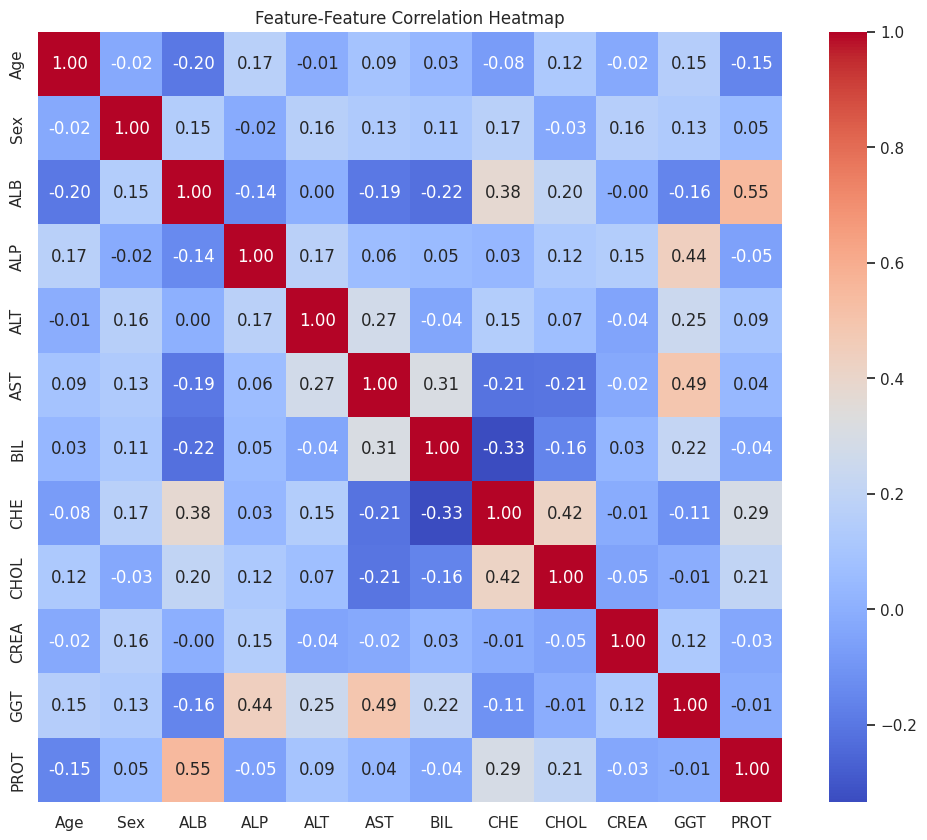

In [ ]:
# Calculate the correlation matrix for all features (excluding the target)
feature_corr_matrix = df.drop('Category', axis=1).corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature-Feature Correlation Heatmap")
plt.show()

**Feature-Target Correlation Analysis**

Correlation of each feature with 'Category':
AST     0.648341
BIL     0.473006
GGT     0.471164
CREA    0.182040
ALT     0.106369
Age     0.106341
Sex     0.060657
ALP     0.028488
PROT    0.007160
ALB    -0.285467
CHOL   -0.300254
CHE    -0.329472
Name: Category, dtype: float64




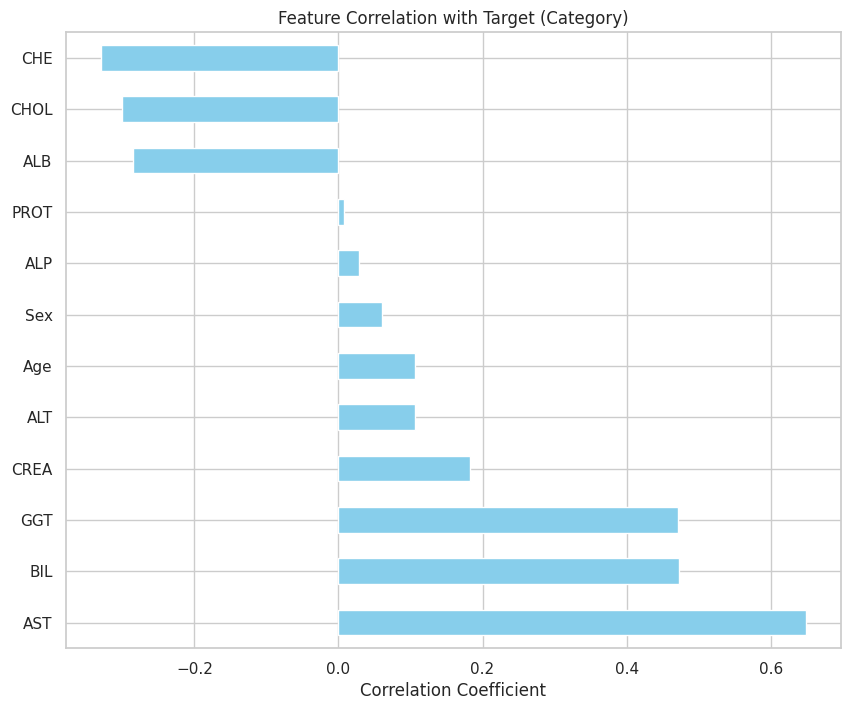

In [ ]:
# Calculate the correlation of every feature with the target variable 'Category'
feature_target_corr = df.corr()['Category'].sort_values(ascending=False)

# Display the sorted correlations
print("Correlation of each feature with 'Category':")
# Drop the target's correlation with itself for a cleaner list
print(feature_target_corr.drop('Category'))
print("\n")

# Visualize the Feature-Target correlation
plt.figure(figsize=(10, 8))
feature_target_corr.drop('Category').plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Target (Category)')
plt.xlabel('Correlation Coefficient')
plt.show()

### Note on Feature Selection & Dimensionality Reduction

For this classification dataset, we have analyzed the features and determined that the following advanced techniques are not necessary for this particular problem.

1.  **Chi-Square Test:**
    * **Purpose:** The Chi-Square test is used to check the relationship between two **categorical** features.
    * **Reason for Skipping:** After our preprocessing, we only have one remaining categorical feature (`Sex`). Since the Chi-Square test requires at least two categorical features to compare, it is not applicable here. We will use this method later on the Titanic dataset, which has multiple categorical features.

2.  **Principal Component Analysis (PCA):**
    * **Purpose:** PCA is an unsupervised technique used to reduce the number of features, especially when they are highly correlated (multicollinearity).
    * **Reason for Skipping:** Our correlation analysis showed that there are no highly correlated features in this dataset. Therefore, applying PCA would not provide a significant benefit and would make the features harder to interpret.

3.  **Linear Discriminant Analysis (LDA):**
    * **Purpose:** LDA is a supervised technique that reduces dimensionality by finding new features that maximize the separation between classes.
    * **Reason for Skipping:** While LDA is suitable for classification, it is most effective when the classes are well-separated and follow a normal distribution. Given the nature of this dataset, it's not the primary method we will focus on. However, it will be applied to the Titanic dataset for demonstration as required by the assignment.

**Conclusion:** We will proceed directly to model training with the current set of features, as they are already in good condition.

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# 1. Separate the target and any binary columns that do not need scaling.
target_col = df['Category']
binary_col = df['Sex']
features_to_normalize = df.drop(['Category', 'Sex'], axis=1)

# 2. Initialize the MinMaxScaler
scaler = MinMaxScaler()

# 3. Fit and transform only the continuous numerical features
print("--- Normalizing continuous numerical features ---")
scaled_features_array = scaler.fit_transform(features_to_normalize)

# Convert the scaled array back to a DataFrame to keep the column names
scaled_features_df = pd.DataFrame(scaled_features_array, columns=features_to_normalize.columns)

# 4. Recombine the normalized features with the columns we set aside
df_normalized = pd.concat([target_col, binary_col, scaled_features_df], axis=1)

print("\n")
print("--- Final DataFrame After Normalization ---")
print(df_normalized)

df = df_normalized

--- Normalizing continuous numerical features ---


--- Final DataFrame After Normalization ---
     Category  Sex       Age       ALB       ALP       ALT       AST  \
0           0    1  0.224138  0.350669  0.101653  0.020962  0.036694   
1           0    1  0.224138  0.350669  0.145571  0.052713  0.044990   
2           0    1  0.224138  0.475483  0.156427  0.108816  0.134014   
3           0    1  0.224138  0.420505  0.100419  0.091554  0.038290   
4           0    1  0.224138  0.361070  0.154947  0.097719  0.045310   
..        ...  ...       ...       ...       ...       ...       ...   
610         4    0  0.741379  0.254086  1.000000  0.015413  0.318124   
611         4    0  0.775862  0.135215  0.225759  0.006165  0.107849   
612         4    0  0.775862  0.209510  0.187515  0.008015  0.282068   
613         4    0  0.465517  0.268945  0.140597  0.117448  0.164008   
614         4    0  0.689655  0.313522  0.140597  0.305487  0.221442   

          BIL       CHE      CHOL      

# Train And Test Splitting

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop("Category", axis=1) # Drop the target column to get the features
Y = df["Category"] # Set the target column


In [ ]:
# Visualize rows and column x
X.shape


(615, 12)

In [ ]:
Y.shape

(615,)

### **Balanced Class**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Visualize training data
print(f"Rows and columns of training data X_train:{X_train.shape}")
print(f"Rows and columns of training data y_train:{y_train.shape}")
print(f"Rows and columns of training data X_test:{X_test.shape}")
print(f"Rows and columns of training data y_test:{y_test.shape}")

Rows and columns of training data X_train:(492, 12)
Rows and columns of training data y_train:(492,)
Rows and columns of training data X_test:(123, 12)
Rows and columns of training data y_test:(123,)


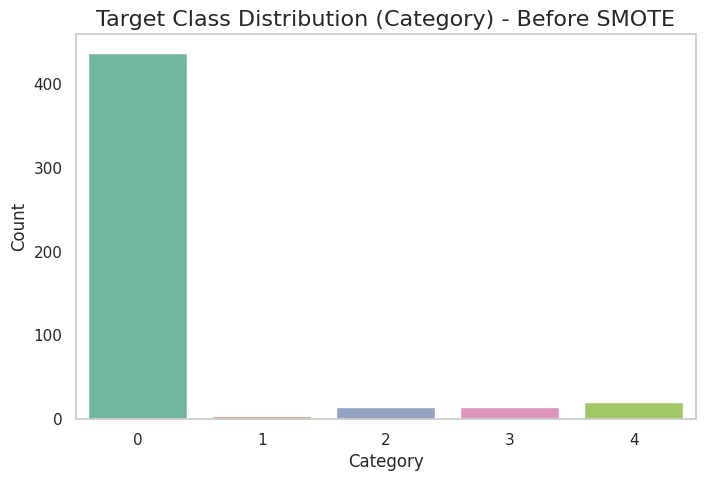


Class distribution before SMOTE:
Category
0    437
4     21
3     15
2     15
1      4
Name: count, dtype: int64


In [ ]:
import pandas as pd # Import pandas library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title('Target Class Distribution (Category) - Before SMOTE', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution before SMOTE:\n{pd.Series(y_train).value_counts()}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE with fewer neighbors to the training set to balance the classes
smote = SMOTE(k_neighbors=2, random_state=42)  # Reduce k_neighbors to 2 or any number < 5
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


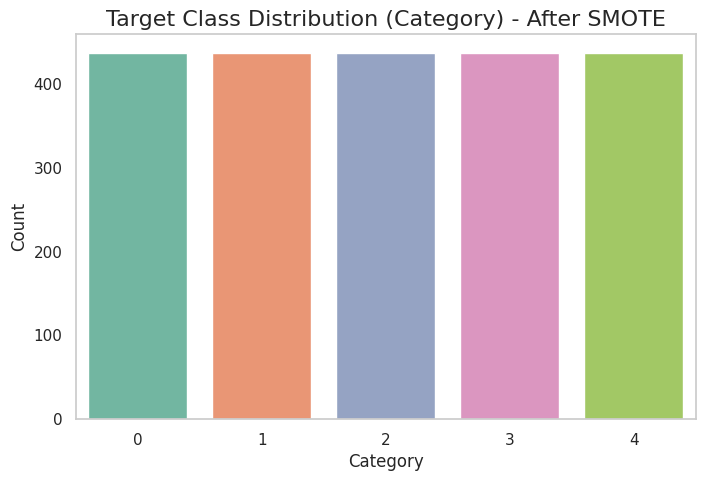


Class distribution after SMOTE:
Category
0    437
3    437
4    437
2    437
1    437
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_res, palette='Set2')
plt.title('Target Class Distribution (Category) - After SMOTE', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution after SMOTE:\n{pd.Series(y_train_res).value_counts()}")

# Model Train and Evaluation

--- Training and Evaluating Logistic Regression ---
Accuracy: 0.8130
Precision: 0.7028
Recall: 0.8130


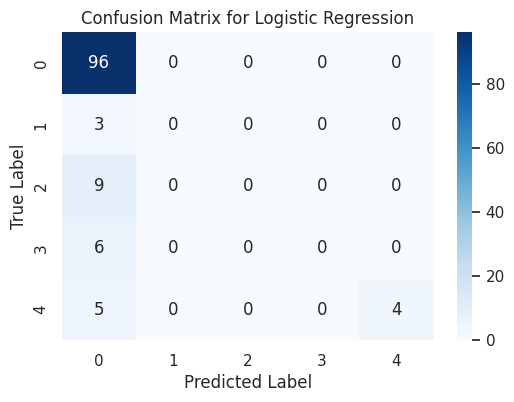



--- Training and Evaluating KNN ---
Accuracy: 0.7967
Precision: 0.6924
Recall: 0.7967


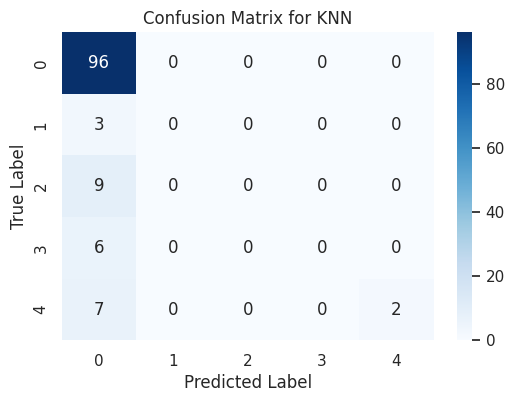



--- Training and Evaluating SVM ---
Accuracy: 0.8130
Precision: 0.7028
Recall: 0.8130


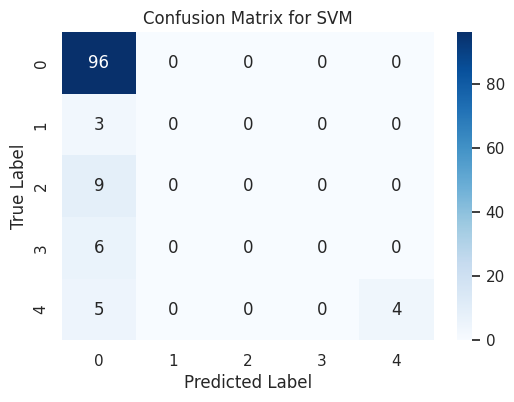



--- Training and Evaluating Decision Tree ---
Accuracy: 0.8780
Precision: 0.8635
Recall: 0.8780


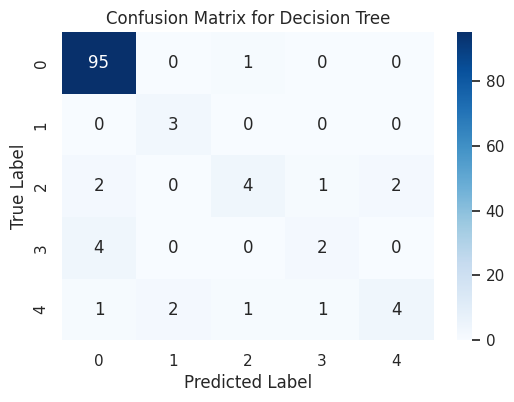



--- Training and Evaluating Deep Learning Model ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy: 0.8780
Precision: 0.8801
Recall: 0.8780


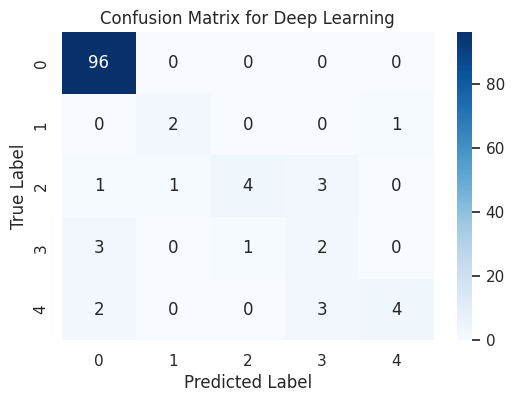



--- Generating ROC Curves for All Models ---


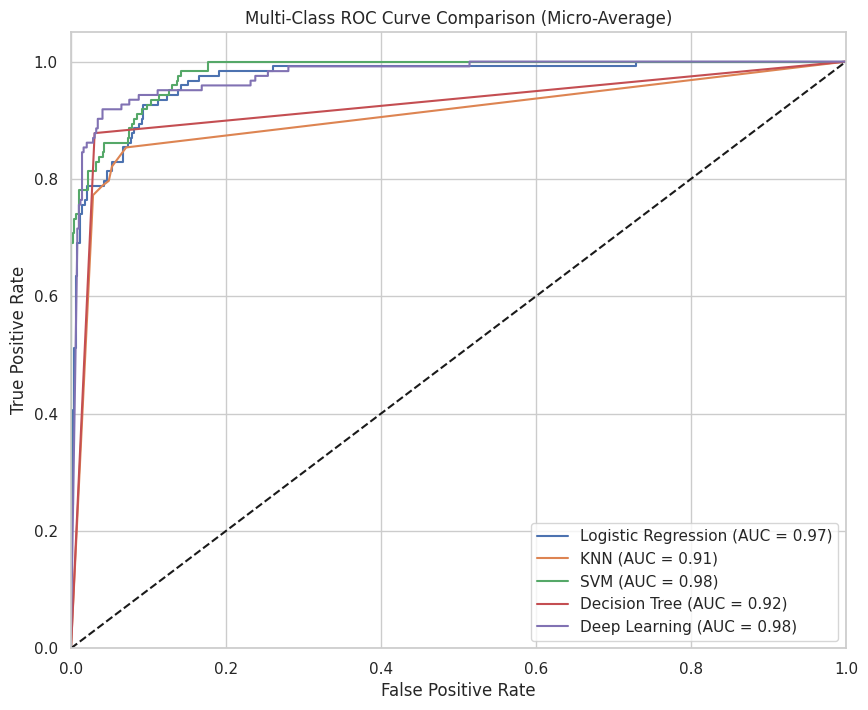

In [ ]:
# --- 1. Initialize and Train Models ---
# We will use a dictionary to store our trained models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionary to store model predictions and scores for ROC curve
model_results = {}

# Train each model and evaluate its performance
for name, model in models.items():
    print(f"--- Training and Evaluating {name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Store predictions and scores for ROC curve
    model_results[name] = {'y_pred': y_pred}
    if hasattr(model, "predict_proba"):
        model_results[name]['y_pred_proba'] = model.predict_proba(X_test)

    # --- Visualize Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(Y), yticklabels=np.unique(Y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n" + "="*50 + "\n")



print("--- Training and Evaluating Deep Learning Model ---")
# One-hot encode the target variable for the neural network
y_train_dl = to_categorical(y_train, num_classes=5)
y_test_dl = to_categorical(y_test, num_classes=5)

# Define the model architecture with 3 hidden layers
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train.shape[1]]), # Input layer
    Dense(128, activation='relu'),                               # Hidden layer 1
    Dense(64, activation='relu'),                                # Hidden layer 2
    Dense(32, activation='relu'),                                # Hidden layer 3
    Dense(5, activation='softmax')                               # Output layer for 5 classes
])

# Compile the model
dl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
dl_model.fit(X_train, y_train_dl, epochs=1000, batch_size=16, verbose=0)

# Make probability predictions
y_pred_proba_dl = dl_model.predict(X_test)
# Convert probabilities to class labels
y_pred_dl = np.argmax(y_pred_proba_dl, axis=1)

# Calculate Metrics
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')

print(f"Accuracy: {accuracy_dl:.4f}")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall: {recall_dl:.4f}")

# Store results for ROC curve
model_results['Deep Learning'] = {'y_pred': y_pred_dl, 'y_pred_proba': y_pred_proba_dl}

# Visualize Confusion Matrix for Deep Learning model
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix for Deep Learning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\n" + "="*50 + "\n")


# --- 3. Plot ROC Curves for All Models ---
print("--- Generating ROC Curves for All Models ---")
plt.figure(figsize=(10, 8))

# Binarize the output for multiclass ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(Y))
n_classes = y_test_binarized.shape[1]

for name, result in model_results.items():
    if 'y_pred_proba' in result:
        y_pred_proba = result['y_pred_proba']

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.plot(fpr["micro"], tpr["micro"],
                 label=f'{name} (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve Comparison (Micro-Average)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Download Notebook As PDF**

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc -y
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Assignement-1(Classification _base_ Datasets).ipynb'
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/Assignement-1(Classification _base_ Datasets).pdf')

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,002 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [80.4 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,791 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:13 https://ppa.launchpadcontent.net/graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>